**Objective:**

The objective of the project is to compare the effectiveness of two clustering methods, K-Means Clustering and Gaussian Mixture Model Clustering, using a specific dataset.

The dataset contains information related to Car's price, model, brand, mileage and year of production. The goal is to determine which clustering method yields more meaningful and interpretable clusters based on these features.

By evaluating the Silhouette Score and Davies-Bouldin Score for each clustering method, the project aims to identify the technique that provides the most distinct and well-separated clusters. This analysis will help in understanding the underlying patterns and relationships within the data, ultimately guiding decision-making processes and potentially uncovering insights for targeted marketing or customer segmentation strategies.

In [5]:
!pip install pydataset

In [6]:
# Required Libraries
import pandas as pd, numpy as np # For Data Manipulation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
import pandas as pd, numpy as np # For Data Manipulation
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
import seaborn as sns
import os
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

In [ ]:
df = pd.read_csv("Car_Data2.csv")

# **ABOUT THE DATA SET**

This dataset provides a comprehensive collection of randomly generated attributes related to automobiles, encompassing various brands, models, and characteristics. With over 3000 entries, this synthetic dataset offers a diverse representation of cars, making it ideal for a wide range of analytical and modeling tasks within the automotive domain.

**Attributes:**

ID: Unique identifier for each car entry.

Brand: Generated car brand, featuring a wide range of manufacturers.

Model: Corresponding car model based on the selected brand, offering diverse options for analysis.

Year: Assigned manufacturing year, spanning from 1990 to 2022, representing the age of the vehicle.

Color: Selected color for each car entry, providing a visual representation of diversity among vehicles.

Mileage: Generated mileage of the vehicle, indicating the distance traveled and potential wear and tear.

Price: Assigned price of the car, facilitating analysis based on the financial aspect.

Condition: Indicates whether the car is new or used, offering insights into its current state.

**Purpose:**

This dataset serves as a valuable resource for various applications, including:

Exploratory Data Analysis (EDA): Researchers and analysts can conduct in-depth exploratory analysis to uncover trends, patterns, and correlations within the automotive domain.

Predictive Modeling: Data scientists can utilize this dataset to build and train machine learning models for tasks such as price prediction, condition classification, and mileage estimation.

Market Research: Automotive industry professionals can leverage this dataset for market research purposes, gaining insights into consumer preferences, pricing trends, and brand popularity.

In [8]:
df

,ID,Brand,Model,Year,Color,Mileage,Price,Condition
0,1,Mazda,Generic Model 3,2003,Blue,12.032885,65732,New
1,2,Jaguar,Generic Model 2,2003,Silver,6.260853,58620,New
2,3,Land Rover,Generic Model 2,2022,Green,14.929521,50574,New
3,4,Porsche,Generic Model 2,1997,Black,14.966376,35436,Used
4,5,Land Rover,Generic Model 3,2000,Black,10.402131,63880,Used
...,...,...,...,...,...,...,...,...
99995,99996,Lexus,Generic Model 1,2018,Red,13.515379,31762,New
99996,99997,Nissan,Generic Model 1,2015,Green,5.134586,78376,New
99997,99998,Land Rover,Generic Model 1,2009,White,6.914035,45681,Used
99998,99999,Toyota,Tacoma,2010,White,12.773766,15085,Used


In [9]:
missing_values = ["NaN"]
df = pd.read_csv("Car_Data2.csv", na_values=missing_values)

In [10]:
variable_missing_data = df.isna().sum(); variable_missing_data # Variable-wise Missing Data Information

ID           0
Brand        0
Model        0
Year         0
Color        0
Mileage      0
Price        0
Condition    0
dtype: int64

In [11]:
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data

0        0
66650    0
66672    0
66671    0
66670    0
dtype: int64

In [12]:
df.dropna(how="all")

,ID,Brand,Model,Year,Color,Mileage,Price,Condition
0,1,Mazda,Generic Model 3,2003,Blue,12.032885,65732,New
1,2,Jaguar,Generic Model 2,2003,Silver,6.260853,58620,New
2,3,Land Rover,Generic Model 2,2022,Green,14.929521,50574,New
3,4,Porsche,Generic Model 2,1997,Black,14.966376,35436,Used
4,5,Land Rover,Generic Model 3,2000,Black,10.402131,63880,Used
...,...,...,...,...,...,...,...,...
99995,99996,Lexus,Generic Model 1,2018,Red,13.515379,31762,New
99996,99997,Nissan,Generic Model 1,2015,Green,5.134586,78376,New
99997,99998,Land Rover,Generic Model 1,2009,White,6.914035,45681,Used
99998,99999,Toyota,Tacoma,2010,White,12.773766,15085,Used


# **Descriptive Analysis of the Dataset**





In [13]:
# Data Bifurcation
df_cat = df[['Brand','Model', 'Year', 'Condition','Color']] # Categorical Data [Nominal | Ordinal]
df_noncat = df[[ 'ID','Price','Mileage']] # Non-Categorical Data
df_cat
df_noncat.head(2)

,ID,Price,Mileage
0,1,65732,12.032885
1,2,58620,6.260853


In [14]:
si_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # Strategy = median [When Odd Number of Categories Exists]
si_cat_fit = si_cat.fit_transform(df_cat)
df_cat_mdi = pd.DataFrame(si_cat_fit, columns=df_cat.columns); df_cat_mdi # Missing Categorical Data Imputed Subset
df_cat_mdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Brand      100000 non-null  object
 1   Model      100000 non-null  object
 2   Year       100000 non-null  object
 3   Condition  100000 non-null  object
 4   Color      100000 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [15]:
si_noncat = SimpleImputer(missing_values=np.nan, strategy='mean')
si_noncat_fit = si_noncat.fit_transform(df_noncat)
df_noncat_mdi_si = pd.DataFrame(si_noncat_fit, columns=df_noncat.columns); df_noncat_mdi_si
df_noncat_mdi_si.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID       100000 non-null  float64
 1   Price    100000 non-null  float64
 2   Mileage  100000 non-null  float64
dtypes: float64(3)
memory usage: 2.3 MB


In [16]:
# Excluding Empty Records (If Any)
df_cat_mdi.dropna(axis=0, how='all', inplace=True) # Categorical Data Subset
df_noncat_mdi_si.dropna(axis=0, how='all', inplace=True) # Non-Categorical Data Subset
#df_noncat_mdi_ki.dropna(axis=0, how='all', inplace=True) # Non-Categorical Data Subset

In [17]:
# Excluding Empty Variables (If Any)
df_cat_mdi.dropna(axis=1, how='all', inplace=True) # Categorical Data Subset
df_noncat_mdi_si.dropna(axis=1, how='all', inplace=True) # Non-Categorical Data Subset
#df_noncat_mdi_ki.dropna(axis=1, how='all', inplace=True) # Non-Categorical Data Subset

In [18]:

df_cat_mdt = df_cat_mdi.copy() # Missing Categorical Treated Dataset
df_noncat_mdt = df_noncat_mdi_si.copy() # Missing Non-Categorical Treated Dataset
#df_noncat_mdt = df_noncat_mdi_ki.copy() # Missing Non-Categorical Treated Dataset

In [19]:
# Dataset Used : df_cat_mdt
df_cat_mdt_code = df_cat_mdt.copy()

# Using Pandas (Inferior)
df_cat_mdt_code_pd = df_cat_mdt_code.astype('category')
df_cat_mdt_code_pd['Condition'] = df_cat_mdt_code_pd['Condition'].cat.codes
df_cat_mdt_code_pd['Brand'] = df_cat_mdt_code_pd['Brand'].cat.codes
df_cat_mdt_code_pd['Model'] = df_cat_mdt_code_pd['Model'].cat.codes
df_cat_mdt_code_pd['Color'] = df_cat_mdt_code_pd['Color'].cat.codes
df_cat_mdt_code_pd # (Missing Data Treated) Numeric Coded Categorical Dataset using Pandas


,Brand,Model,Year,Condition,Color
0,11,13,2003,0,1
1,6,12,2003,0,4
2,9,12,2022,0,2
3,14,12,1997,1,0
4,9,13,2000,1,0
...,...,...,...,...,...
99995,10,11,2018,0,3
99996,13,11,2015,0,2
99997,9,11,2009,1,5
99998,17,20,2010,1,5


In [20]:
# 3.1. Standardization
ss = StandardScaler()
ss_fit = ss.fit_transform(df_noncat_mdt[['Price','Mileage']])
df_noncat_std = pd.DataFrame(ss_fit, columns=['Price_std','Mileage_std']); df_noncat_std
#df_noncat_std = pd.DataFrame(ss_fit, columns=df_noncat_mdt.columns+'_std'); df_noncat_std
df_noncat_mdt_std = df_noncat_mdt.join(df_noncat_std); df_noncat_mdt_std

,ID,Price,Mileage,Price_std,Mileage_std
0,1.0,65732.0,12.032885,1.072359,0.706778
1,2.0,58620.0,6.260853,0.743590,-1.295805
2,3.0,50574.0,14.929521,0.371644,1.711755
3,4.0,35436.0,14.966376,-0.328146,1.724541
4,5.0,63880.0,10.402131,0.986746,0.140995
...,...,...,...,...,...
99995,99996.0,31762.0,13.515379,-0.497986,1.221124
99996,99997.0,78376.0,5.134586,1.656859,-1.686559
99997,99998.0,45681.0,6.914035,0.145454,-1.069187
99998,99999.0,15085.0,12.773766,-1.268920,0.963824


In [21]:
# Subset df
df_subset = df[['Price', 'Mileage']]; df_subset

,Price,Mileage
0,65732,12.032885
1,58620,6.260853
2,50574,14.929521
3,35436,14.966376
4,63880,10.402131
...,...,...
99995,31762,13.515379
99996,78376,5.134586
99997,45681,6.914035
99998,15085,12.773766


In [22]:
df_cat_mdt_code = df_cat_mdt.copy()

In [23]:
df_noncat_ppd = df_noncat_mdt_std.copy(); df_noncat_ppd
df_noncat_ppd

,ID,Price,Mileage,Price_std,Mileage_std
0,1.0,65732.0,12.032885,1.072359,0.706778
1,2.0,58620.0,6.260853,0.743590,-1.295805
2,3.0,50574.0,14.929521,0.371644,1.711755
3,4.0,35436.0,14.966376,-0.328146,1.724541
4,5.0,63880.0,10.402131,0.986746,0.140995
...,...,...,...,...,...
99995,99996.0,31762.0,13.515379,-0.497986,1.221124
99996,99997.0,78376.0,5.134586,1.656859,-1.686559
99997,99998.0,45681.0,6.914035,0.145454,-1.069187
99998,99999.0,15085.0,12.773766,-1.268920,0.963824


In [24]:
df_cat_ppd = df_cat_mdt_code_pd.copy(); df_cat_ppd

,Brand,Model,Year,Condition,Color
0,11,13,2003,0,1
1,6,12,2003,0,4
2,9,12,2022,0,2
3,14,12,1997,1,0
4,9,13,2000,1,0
...,...,...,...,...,...
99995,10,11,2018,0,3
99996,13,11,2015,0,2
99997,9,11,2009,1,5
99998,17,20,2010,1,5


In [25]:
# Pre-Processed Dataset
df_ppd = pd.merge(df_cat_ppd, df_noncat_ppd, left_index=True, right_index=True); df_ppd

,Brand,Model,Year,Condition,Color,ID,Price,Mileage,Price_std,Mileage_std
0,11,13,2003,0,1,1.0,65732.0,12.032885,1.072359,0.706778
1,6,12,2003,0,4,2.0,58620.0,6.260853,0.743590,-1.295805
2,9,12,2022,0,2,3.0,50574.0,14.929521,0.371644,1.711755
3,14,12,1997,1,0,4.0,35436.0,14.966376,-0.328146,1.724541
4,9,13,2000,1,0,5.0,63880.0,10.402131,0.986746,0.140995
...,...,...,...,...,...,...,...,...,...,...
99995,10,11,2018,0,3,99996.0,31762.0,13.515379,-0.497986,1.221124
99996,13,11,2015,0,2,99997.0,78376.0,5.134586,1.656859,-1.686559
99997,9,11,2009,1,5,99998.0,45681.0,6.914035,0.145454,-1.069187
99998,17,20,2010,1,5,99999.0,15085.0,12.773766,-1.268920,0.963824


In [26]:
# Dropping specified columns
columns_to_drop = ['ID','Year']
df_1 = df_ppd.drop(columns=columns_to_drop)
df_1

,Brand,Model,Condition,Color,Price,Mileage,Price_std,Mileage_std
0,11,13,0,1,65732.0,12.032885,1.072359,0.706778
1,6,12,0,4,58620.0,6.260853,0.743590,-1.295805
2,9,12,0,2,50574.0,14.929521,0.371644,1.711755
3,14,12,1,0,35436.0,14.966376,-0.328146,1.724541
4,9,13,1,0,63880.0,10.402131,0.986746,0.140995
...,...,...,...,...,...,...,...,...
99995,10,11,0,3,31762.0,13.515379,-0.497986,1.221124
99996,13,11,0,2,78376.0,5.134586,1.656859,-1.686559
99997,9,11,1,5,45681.0,6.914035,0.145454,-1.069187
99998,17,20,1,5,15085.0,12.773766,-1.268920,0.963824


**CLUSTERING**

**K-MEANS CLUSTERING**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

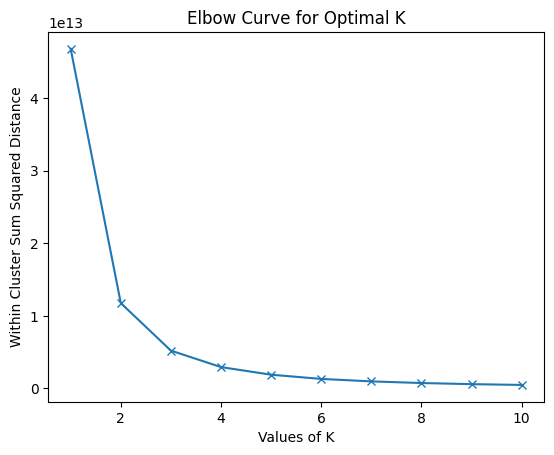

In [27]:
# 2.1.1. Determine Value of 'K' in K-Means using Elbow Curve & KMeans-Inertia
# ---------------------------------------------------------------------------
'''
KMeans-Inertia : Sum of Squared Distances of Samples to their closest Cluster Center (Centroid), Weighted by the Sample Weights (if provided)
'''
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,11) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=111)
    kmeans.fit(df_1)
    wcssd.append(kmeans.inertia_)
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K')
plt.ylabel('Within Cluster Sum Squared Distance')
plt.title('Elbow Curve for Optimal K')
plt.show()

In [28]:
#2.1.2. Create K-Means Clusters [K=2]
# ------------------------------------------

km_df_1cluster = kmclus(n_clusters=2, init='random', random_state=222)
km_df_1cluster_model = km_df_1cluster.fit_predict(df_1); km_df_1cluster_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 1, 0, 0], dtype=int32)

In [29]:
# 2.1.3. K-Means Clustering Model Evaluation [K=2]]
# ------------------------------------------------------

dbscore_km_df_1cluster = dbscore(df_1, km_df_1cluster_model); dbscore_km_df_1cluster

0.501657972210319

In [30]:
sscore_km_df_1cluster = sscore(df_1, km_df_1cluster_model); sscore_km_df_1cluster

0.6257016833979971

In [31]:
# 2.2. Create a KMeans Cluster Member Dataframe
# ---------------------------------------------

# Cluster Model Used : km_df_1cluster_model
kmeans = KMeans(n_clusters=2, random_state=42)


df_subset_kmcluster = df_1.copy()
df_subset_kmcluster.reset_index(level=0, inplace=True, names='Car_Index')
df_subset_kmcluster['cluster_number'] = km_df_1cluster_model
df_subset_kmcluster.sort_values('cluster_number', inplace=True); df_subset_kmcluster

,Car_Index,Brand,Model,Condition,Color,Price,Mileage,Price_std,Mileage_std,cluster_number
49999,49999,4,1,0,3,20216.0,10.251448,-1.031727,0.088715,0
55618,55618,12,13,0,2,25338.0,12.451942,-0.794951,0.852168,0
55619,55619,13,11,1,5,8755.0,9.256639,-1.561540,-0.256429,0
55620,55620,15,11,0,1,12496.0,9.856231,-1.388603,-0.048403,0
55621,55621,17,20,0,1,18446.0,14.847070,-1.113550,1.683149,0
...,...,...,...,...,...,...,...,...,...,...
58660,58660,8,13,0,0,43342.0,9.731620,0.037328,-0.091637,1
58661,58661,19,13,0,0,68502.0,11.489709,1.200409,0.518325,1
58664,58664,1,11,1,3,50302.0,5.829184,0.359070,-1.445571,1
58649,58649,16,11,0,0,77404.0,9.488544,1.611926,-0.175971,1


[Text(0.5, 1.0, 'Mileage vs Price Scatter Plot : K-Means Clusters')]

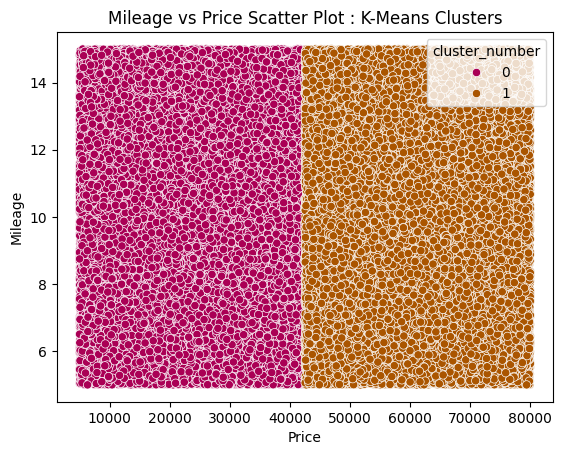

In [32]:
#2.3. Plot the K-Means Clustered Data
# ------------------------------------

# Cluster Model Used : km_df_1cluster_model

km_clusterplot_sb = sns.scatterplot(x='Price', y='Mileage', hue='cluster_number', palette='brg', data=df_subset_kmcluster)
km_clusterplot_sb.set(title='Mileage vs Price Scatter Plot : K-Means Clusters')

**GAUSSIAN MIXTURE MODEL CLUSTERING**

In [33]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Assuming 'data' is your DataFrame with features

# Extracting features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_1)

# Specify the number of clusters (adjust as needed)
n_clusters = 2

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
df_1['GMM_Labels'] = gmm.fit_predict(scaled_features)



In [ ]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_features, df_1['GMM_Labels'])
print("Silhouette Score for GMM Clustering:", silhouette_avg)

In [ ]:
# Scatter plot with color-coded clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Price', hue='GMM_Labels', data=df_1, palette='viridis', legend='full', s=80)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

1. size of clustering
2. comparison on memory and time taken
3. Composition of each cluster
